In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.0/458.0 KB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 2.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 639.6/639.6 KB 4.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 2.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import spacy
import nltk
import re
import string
import pandas as pd
import numpy as np
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import json
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/yejin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yejin/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/yejin/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [41]:
stop_words = set(stopwords.words('english'))
stop_words.update(('\r\n', '\n\r', 'ever', 'much', 'look', 'squid', 'show', 'thing', "i've", 'anything', 'something', "show's",
                   'www', 'soompi' 'com','instagram', 'youtube', 'https', 'mydramalist', 'twitter', 'episode', 'comment', 'scene', 
                   'version', "he's", 'gonna', 'series', 'watch', 'everything', 'something', "can't",'list', 'spoiler', 'dramas', 
                   'drama', 'wait', 'preview', 'someone', 'everyone', 'dont', 'think', 'season', 'time', 'anyone', 'something', 
                   'anything', 'nothing', 'world', 'status', 'week' ,'name', 'cause', 'time', 'en', 'org', 'wikipedia', 'wiki', 
                   'pbs', 'twimg','year', 'point', 'please', 'today', 'haha', 'case', 'guess', 'reason', 'person', 'moment', 
                   'sense', 'kinda', 'part', 'movie', 'school', 'start', 'work', 'lead', 'kind', 'rate', 'rating' ,'rate', 'men', 
                   'example', 'idea', 'half', 'review', 'genre', 'side', "that's", "they're", 'till', 'tell', 'phone', 'section', 
                   'number', 'company', 'line', "there's", 'male', 'team', 'rating', 'baby', 'course', 'care', 'cute', 'question', 
                   'help', 'group', 'hand', 'hate', 'need', 'mess', 'change', 'drop', 'date', 'netflix', 'yeah', 'daon', 
                   'park', 'thank', 'lmao', 'damn',"i'll", 'thing', 'random', 'year','thanks','day', 'others', 'feel', 'kdrama', 'talk',
                  'opinion', 'fact'))

In [6]:
df = pd.read_csv('/Users/yejin/workspace/0425_ENG_final_drama_reviews.csv')
df

,Unnamed: 0,Unnamed: 0.1,reviews,title
0,0,0,How criminal profiling came to be in South Kor...,악의마음을읽는자들
1,1,1,G r i p p i n g All the cases are based on tru...,악의마음을읽는자들
2,2,2,Darkness cannot drive out darkness only light ...,악의마음을읽는자들
3,3,3,Brilliant in every aspect There is no such thi...,악의마음을읽는자들
4,4,4,A Wonderfully Grim and Enthralling Show Throug...,악의마음을읽는자들
...,...,...,...,...
182682,193865,258880,Acting was subpar frankly and the lead actress...,동백꽃필무렵
182683,193866,258881,Aside from the mystery solving of Joker this s...,동백꽃필무렵
182684,193867,258882,It's full of meaning It deserve better The act...,동백꽃필무렵
182685,193868,258883,Really heartwarming romance amidst the danger ...,동백꽃필무렵


In [7]:
titles = df['title']

In [8]:
df_lower = df['reviews'].str.lower()

In [9]:
df_lower = pd.DataFrame(df_lower)

In [10]:
df_lower['title'] = titles

In [11]:
df_lower

,reviews,title
0,how criminal profiling came to be in south kor...,악의마음을읽는자들
1,g r i p p i n g all the cases are based on tru...,악의마음을읽는자들
2,darkness cannot drive out darkness only light ...,악의마음을읽는자들
3,brilliant in every aspect there is no such thi...,악의마음을읽는자들
4,a wonderfully grim and enthralling show throug...,악의마음을읽는자들
...,...,...
182682,acting was subpar frankly and the lead actress...,동백꽃필무렵
182683,aside from the mystery solving of joker this s...,동백꽃필무렵
182684,it's full of meaning it deserve better the act...,동백꽃필무렵
182685,really heartwarming romance amidst the danger ...,동백꽃필무렵


In [42]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df_lower.reviews])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [ ]:
# trigram_measures = nltk.collocations.TrigramAssocMeasures()
# finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in df_lower.reviews])
# # Filter only those that occur at least 50 times
# finder.apply_freq_filter(50)
# trigram_scores = finder.score_ngrams(trigram_measures.pmi)

In [43]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [ ]:
# trigram_pmi = pd.DataFrame(trigram_scores)
# trigram_pmi.columns = ['trigram', 'pmi']
# trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [18]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [ ]:
# # Filter for trigrams with only noun-type structures
# def trigram_filter(trigram):
#     tag = nltk.pos_tag(trigram)
#     if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
#         return False
#     if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
#         return False
#     if 'n' in trigram or 't' in trigram:
#          return False
#     if 'PRON' in trigram:
#         return False
#     return True

In [44]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

# filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
#                                                  trigram_filter(trigram['trigram'])\
#                                                  and trigram.pmi > 5, axis = 1)][:500]


bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 3 or len(x[1]) > 3]
# trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 3 or len(x[1]) > 3 and len(x[2]) > 3]

In [45]:
bigrams[:10]

['aishwarya nazre',
 'tim burton',
 'chicago typewriter',
 'shannon brown',
 'bates motel',
 'frontal lobe',
 'grim reaper',
 'muskan gupta',
 'designated survivor',
 'loan shark']

In [21]:
# Concatenate n-grams
def replace_ngram(x):
    # for gram in trigrams:
    #     x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [46]:
reviews_w_ngrams = df_lower.copy()

In [47]:
reviews_w_ngrams.reviews = reviews_w_ngrams.reviews.map(lambda x: replace_ngram(x))

In [48]:
reviews_w_ngrams = reviews_w_ngrams.reviews.map(lambda x: [word for word in x.split()\
                                                 if word not in stop_words and len(word) > 3])

In [25]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('V'):
        return 'v'
    elif pos_tag.startswith('N'):
        return 'n'
    elif pos_tag.startswith('J'):
        return 'a'
    elif pos_tag.startswith('R'):
        return 'r'
    else:
        return None

In [49]:
word_list = reviews_w_ngrams.to_list()

In [50]:
lemma = WordNetLemmatizer()
word_list_lemma = []
for ls in word_list:
    word_lem = []
    tag_words = nltk.pos_tag(ls)
    pos_words = []
    for word in tag_words:
        if word[1] in ['NN']:  #'VB', 'VBP', 'JJ'
            pos_words.append(word)
    temp_list = []
    for token, pos_tag in pos_words:
        tag = get_wordnet_pos(pos_tag)
        if tag != None:
            temp_list.append((token, get_wordnet_pos(pos_tag)))
    token_final = [lemma.lemmatize(token, pos=tag) for token, tag in temp_list]
    word_list_lemma.append(token_final)

In [28]:
# Filter for only nouns
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

In [51]:
word_list_lemma = pd.Series(word_list_lemma)

In [52]:
final_reviews = word_list_lemma.map(noun_only)

In [53]:
len(final_reviews)

182687

In [ ]:
# tokens = [v for v in final_reviews if v]

In [ ]:
# len(tokens)

162778

In [54]:
dictionary = corpora.Dictionary(final_reviews)
dictionary.filter_extremes(no_below=20, no_above=0.5)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_reviews]

In [55]:
coherence = []
for k in range(3, 5):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
                   iterations=250, chunksize = 10000, eval_every = None, random_state=None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

Round: 3
Round: 4


In [56]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

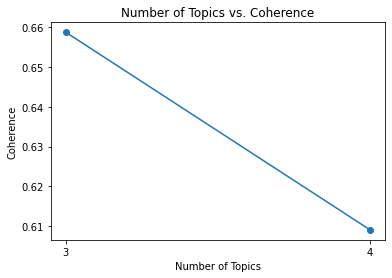

In [57]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [62]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, passes=40,\
               iterations=250,  chunksize = 10000, eval_every = 1, random_state=None)

In [ ]:
Lda2 = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda2(doc_term_matrix, num_topics=3, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

In [63]:
# To show initial topics
ldamodel.show_topics(4, num_words=15, formatted=False)

[(0,
  [('love', 0.05161402),
   ('relationship', 0.04562925),
   ('opinion', 0.023704384),
   ('wife', 0.020939723),
   ('mother', 0.019955251),
   ('family', 0.017281761),
   ('girl', 0.013397283),
   ('woman', 0.013165341),
   ('brother', 0.012988528),
   ('friend', 0.012442749),
   ('child', 0.011269359),
   ('husband', 0.011094719),
   ('daughter', 0.009462017),
   ('father', 0.008847728),
   ('shinwoo', 0.008377683)]),
 (1,
  [('life', 0.06709104),
   ('heart', 0.024385964),
   ('fact', 0.020375947),
   ('death', 0.014601268),
   ('family', 0.012569434),
   ('place', 0.0125114275),
   ('doctor', 0.011738694),
   ('face', 0.0115623),
   ('money', 0.010518373),
   ('mind', 0.009000919),
   ('situation', 0.008978655),
   ('home', 0.007807941),
   ('matter', 0.007475191),
   ('webtoon', 0.007440536),
   ('happiness', 0.007389775)]),
 (2,
  [('story', 0.09572897),
   ('character', 0.07463517),
   ('plot', 0.04440393),
   ('romance', 0.041629672),
   ('chemistry', 0.022106508),
   ('ro

In [ ]:
from gensim.test.utils import datapath

temp_file = datapath("/content/drive/MyDrive/LDA4/lda_model")
ldamodel.save(temp_file)

In [12]:
from gensim.models.ldamodel import LdaModel
temp_file = datapath("/content/drive/MyDrive/LDA4/lda_model")
lda = LdaModel.load(temp_file)

In [14]:
lda.show_topics(4, num_words=15, formatted=False)

[(0,
  [('death', 0.016456554),
   ('family', 0.015953919),
   ('mother', 0.014835676),
   ('doctor', 0.013238285),
   ('face', 0.013050412),
   ('killer', 0.012656475),
   ('money', 0.011855011),
   ('love', 0.0115251755),
   ('girl', 0.010146954),
   ('brother', 0.009724532),
   ('friend', 0.009276425),
   ('home', 0.008795659),
   ('child', 0.0083225295),
   ('place', 0.007945916),
   ('house', 0.007856713)]),
 (1,
  [('plot', 0.04225889),
   ('heart', 0.022474673),
   ('kdrama', 0.022470467),
   ('thriller', 0.01864537),
   ('game', 0.01743026),
   ('mystery', 0.015252511),
   ('crime', 0.014935037),
   ('twist', 0.013027677),
   ('action', 0.011065524),
   ('binge', 0.010009643),
   ('understand', 0.009412649),
   ('love', 0.009250505),
   ('mouse', 0.009153021),
   ('comedy', 0.008856771),
   ('spoiler', 0.00884458)]),
 (2,
  [('game', 0.034649596),
   ('couple', 0.033036277),
   ('actor', 0.032490864),
   ('role', 0.024148418),
   ('wife', 0.023099188),
   ('jung', 0.022001756),

In [ ]:
review_corpus = doc_term_matrix[9]

In [ ]:
vector = ldamodel[review_corpus]
vector

[(0, 0.40505335), (1, 0.19938281), (2, 0.015471145), (3, 0.38009274)]

In [ ]:
%%capture
!pip install pyldavis

In [ ]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
pyLDAvis.enable_notebook()
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

In [ ]:
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,5): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [ ]:
pd.DataFrame.from_dict(all_topics, orient='index')

,0,1,2,3,4,5,6,7,8,9
Topic 1,story,character,plot,romance,love,chemistry,feel,couple,hope,writer
Topic 2,life,family,relationship,death,wife,mother,fact,situation,problem,money
Topic 3,role,actor,jung,kdrama,park,killer,thriller,hyun,mystery,crime
Topic 4,heart,home,country,hell,daon,taekyung,shinwoo,understand,night,blood


In [ ]:
preprocessed_drama_reviews = pd.DataFrame(final_reviews, columns = ['reviews'])

In [ ]:
preprocessed_drama_reviews['title'] = titles

In [ ]:
preprocessed_drama_reviews

,reviews,title
0,"[monster, gaze, nonfiction, book, profiler, or...",악의마음을읽는자들
1,"[chul, storyline, waste, romance, press, accur...",악의마음을읽는자들
2,"[cannot, drive, darkness, action, adaptation, ...",악의마음을읽는자들
3,"[sentence, criminal, bound, crime, investigati...",악의마음을읽는자들
4,"[profiler, analysis, experience, profiler, fac...",악의마음을읽는자들
...,...,...
182682,"[chemistry, suspense]",동백꽃필무렵
182683,"[mystery, absolute, trash, drag, money]",동백꽃필무렵
182684,"[deserve, story]",동백꽃필무렵
182685,"[romance, amidst, danger, serial_killer]",동백꽃필무렵


In [ ]:
drama_list = preprocessed_drama_reviews.title.unique().tolist()
len(drama_list)

92

In [ ]:
from tqdm import tqdm

each_drama_reviews_dict = {'title' : [], 'preprocessed_reviews' : []}
for drama in tqdm(drama_list):
    drama_review_list = preprocessed_drama_reviews[preprocessed_drama_reviews['title'] == drama].reviews.tolist()
    reviews_join = sum(drama_review_list,[])
    each_drama_reviews_dict['title'].append(drama)
    each_drama_reviews_dict['preprocessed_reviews'].append(reviews_join)

100%|██████████| 92/92 [00:16<00:00,  5.58it/s]


In [ ]:
df_each_drama_reviews = pd.DataFrame(each_drama_reviews_dict)

In [ ]:
df_each_drama_reviews.to_csv("/content/drive/MyDrive/2022/each_drama_reviews.csv", index=False)

In [ ]:
df_each_drama_reviews

,title,preprocessed_reviews
0,악의마음을읽는자들,"[monster, gaze, nonfiction, book, profiler, or..."
1,라이프온마스,"[cast, friendship, actor, student, doctor, who..."
2,옷소매붉은끝동,"[choice, life, script, consort, slow_burn, rom..."
3,이구역의미친X,"[scroll, context, trailer, squeeze, burst, lau..."
4,어느날우리집현관으로멸망이들어왔다,"[story, tearjerker, class, lineup, chemistry, ..."
...,...,...
87,뷰티인사이드,"[dream, dream, chaebol, star, chaebol, beauty,..."
88,우리들의블루스,"[life, worth, team, head, depth, baby, story, ..."
89,해피니스,"[WARNING, horror, medication, effect, military..."
90,의사요한,"[news, character, help, actress, hair, mess, c..."


In [ ]:
drama_corpus = [dictionary.doc2bow(text) for text in df_each_drama_reviews['preprocessed_reviews']]

In [ ]:
topic_weight_dict = {'title' : [], 'weight' : []}
for i in tqdm(range(len(drama_corpus))):
    review = drama_corpus[i]
    vector = ldamodel[review]
    topic_weight_dict['title'].append(df_each_drama_reviews.title[i])
    topic_weight_dict['weight'].append(vector)

100%|██████████| 92/92 [00:00<00:00, 456.05it/s]


In [ ]:
df_topic_weight = pd.DataFrame(topic_weight_dict)

In [ ]:
df_topic_weight

,title,weight
0,악의마음을읽는자들,"[(0, 0.13134466), (1, 0.28021014), (2, 0.33005..."
1,라이프온마스,"[(0, 0.15293896), (1, 0.32907936), (2, 0.21708..."
2,옷소매붉은끝동,"[(0, 0.1651475), (1, 0.2770626), (2, 0.1706431..."
3,이구역의미친X,"[(0, 0.13622274), (1, 0.35638067), (2, 0.15675..."
4,어느날우리집현관으로멸망이들어왔다,"[(0, 0.15008435), (1, 0.41545138), (2, 0.17238..."
...,...,...
87,뷰티인사이드,"[(0, 0.13105191), (1, 0.4519349), (2, 0.205951..."
88,우리들의블루스,"[(0, 0.20003211), (1, 0.4119682), (2, 0.151377..."
89,해피니스,"[(0, 0.14177915), (1, 0.29463962), (2, 0.20373..."
90,의사요한,"[(0, 0.11039192), (1, 0.32833654), (2, 0.20242..."


In [ ]:
df_topic_weight.title.unique()

array(['악의마음을읽는자들', '라이프온마스', '옷소매붉은끝동', '이구역의미친X', '어느날우리집현관으로멸망이들어왔다',
       '스물다섯스물하나', '무브투헤븐:나는유품정리사입니다', '호텔델루나',
       '하늘에서내리는일억개의별', '기름진멜로', '악의꽃', '서른이지만열일곱입니다', '킹덤', '작은신의아이들',
       '검색어를입력하세요WWW', '술꾼도시여자들', '한번다녀왔습니다', '서른아홉',
       '오월의청춘', '트랩', '왓쳐', '아는와이프', '자백', '60일지정생존자', '시맨틱에러', '녹두꽃',
       '백일의낭군님', '괴물', '태종이방원', '사이코지만괜찮아', '런온', '365:운명을거스르는1년',
       '시를잊은그대에게', '인간수업', '으라차차와이키키', '우수무당가두심', '트레이서', '사내맞선', '구경이',
       '어쩌다발견한하루', '김비서가왜그럴까', '나의아저씨', '카이로스', '18어게인', 'D.P.', '로스쿨',
       '대박부동산', '사랑의불시착', '스토브리그', '단하나의사랑', '안녕나야', '그림자미녀', '도시남녀의사랑법',
       '본대로말하라', '내뒤에테리우스', '월간집', '비밀의숲', '나빌레라', '슬기로운의사생활', '스카이캐슬',
       '하이에나', '라이브', '갯마을차차차', '소년심판', '그녀의사생활', '손theguest', '세빛남고학생회',
       '오징어게임', '원더우먼', '우아한친구들', '낭만닥터김사부', '마우스', '지옥', '왕이된남자',
       '라켓소년단', '유미의세포들', '부부의세계', '로맨스는별책부록', '미스티', '미치지않고서야',
       '마녀식당으로오세요', '미스터션샤인', '모범택시', '사의찬미', '멜로가체질', '이리와안아줘',
       '보좌관:세사

In [ ]:
df_topic_weight.weight[0]

[(0, 0.13134466), (1, 0.28021014), (2, 0.3300571), (3, 0.25838807)]

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max.colwidth', None)
